# Assignment05
# Name : Dohyun Kwon
# Student ID : 2018120191
# Github repository : https://github.com/hilariouss/assignment05.git

1. Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import ndimage
from skimage import io, color
from skimage import exposure
from math import atan
from PIL import Image

2. Load image

In [2]:
file_image = 'cau.jpg'
im = Image.open('cau.jpg')
im_color = io.imread(file_image)
im_gray = color.rgb2gray(im_color)
width,height=im.size

3. Kernels definition

In [4]:
Derivative_mask_x       = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
Derivative_mask_y       = np.array([[1, 1, 1],[0, 0, 0],[-1, -1, -1]])
Sobel_Gx_kernel =  np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
Sobel_Gy_kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
Smooth_kernel           = np.array([[.11, .11, .11],[.11, .11, .11],[.11, .11, .11]])
MySharpening_kernel     = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

4. Results images

In [7]:
im_conv_Sobel_Gx_kernel = signal.convolve2d(im_gray, Sobel_Gx_kernel, boundary='symm', mode='same')
im_conv_Sobel_Gy_kernel = signal.convolve2d(im_gray, Sobel_Gy_kernel, boundary='symm', mode='same')
im_conv_Sharpen        = signal.convolve2d(im_gray, MySharpening_kernel, boundary='symm', mode='same')
im_conv_Smooth        = signal.convolve2d(im_gray, Smooth_kernel, boundary='symm', mode='same')

5. x and y-gradient of Sobel kernel

In [8]:
sx = ndimage.convolve(im_gray, Sobel_Gx_kernel)
sy = ndimage.convolve(im_gray, Sobel_Gy_kernel)

6. Absolute value of gradient

In [9]:
AbsGrad = np.hypot(sx, sy)

7. Direction of gradient

In [10]:
flatten_sx = sx.flatten() # 2D to 1D
flatten_sy = sy.flatten()
Div_Result = np.zeros(width*height)
for i in range(width*height):
    Div = flatten_sy[i]/flatten_sx[i]
    Div_Result[i] = atan(Div)
Dir = np.reshape(Div_Result, (-1, width))# chg to 2D

C:\Users\Family\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Users\Family\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


8-1. Plot color image

(-0.5, 1967.5, 1346.5, -0.5)

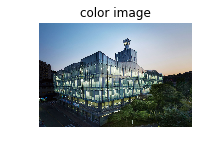

In [20]:
p1 = plt.subplot(1,2,1)
p1.set_title('color image')
plt.imshow(im_color)
plt.axis('off')

8-2. Plot gray image

(-0.5, 1967.5, 1346.5, -0.5)

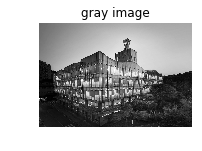

In [21]:
p2 = plt.subplot(1,2,2)
p2.set_title('gray image')
plt.imshow(im_gray, cmap='gray')
plt.axis('off')

8-3. Plot Derivative of x

(-0.5, 1967.5, 1346.5, -0.5)

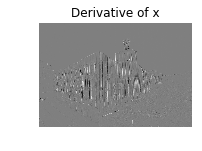

In [22]:
p3 = plt.subplot(1,2,1)
p3.set_title('Derivative of x')
plt.imshow(im_conv_Sobel_Gx_kernel, cmap='gray')
plt.axis('off')

8-4. Plot derivative of y

(-0.5, 1967.5, 1346.5, -0.5)

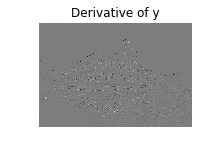

In [23]:
p4 = plt.subplot(1,2,2)
p4.set_title('Derivative of y')
plt.imshow(im_conv_Sobel_Gy_kernel, cmap='gray')
plt.axis('off')

8-5. Plot absolute value of gradient

(-0.5, 1967.5, 1346.5, -0.5)

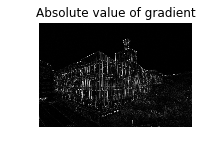

In [24]:
p5 = plt.subplot(1,2,1)
p5.set_title('Absolute value of gradient')
plt.imshow(AbsGrad, cmap='gray')
plt.axis('off')

8-6. Plot direction of gradient

(-0.5, 1967.5, 1346.5, -0.5)

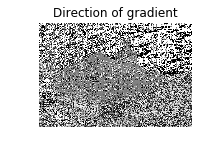

In [25]:
p6 = plt.subplot(1,2,2)
p6.set_title('Direction of gradient')
plt.imshow(Dir, cmap='gray')
plt.axis('off')

8-7. Plot image which is processed with smoothing kernel

(-0.5, 1967.5, 1346.5, -0.5)

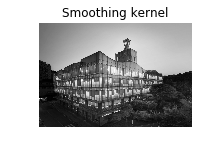

In [26]:
p7 = plt.subplot(1,2,1)
p7.set_title('Smoothing kernel')
plt.imshow(im_conv_Smooth, cmap='gray')
plt.axis('off')

8-8. Plot image which is processed with my own sharpening kernel

(-0.5, 1967.5, 1346.5, -0.5)

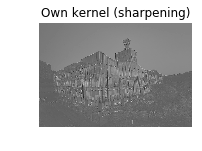

In [27]:
p8 = plt.subplot(1,2,2)
p8.set_title('Own kernel (sharpening)')
plt.imshow(im_conv_Sharpen, cmap='gray')
plt.axis('off')

9. Plot entire results

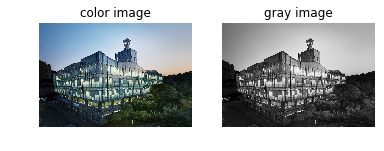

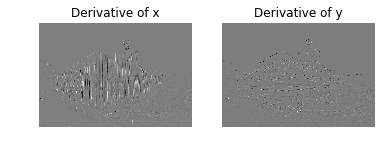

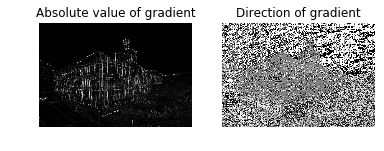

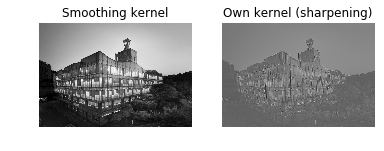

In [28]:
p1 = plt.subplot(1,2,1)
p1.set_title('color image')
plt.imshow(im_color)
plt.axis('off')

p2 = plt.subplot(1,2,2)
p2.set_title('gray image')
plt.imshow(im_gray, cmap='gray')
plt.axis('off')

plt.show()

p3 = plt.subplot(1,2,1)
p3.set_title('Derivative of x')
plt.imshow(im_conv_Sobel_Gx_kernel, cmap='gray')
plt.axis('off')

p4 = plt.subplot(1,2,2)
p4.set_title('Derivative of y')
plt.imshow(im_conv_Sobel_Gy_kernel, cmap='gray')
plt.axis('off')

plt.show()

p5 = plt.subplot(1,2,1)
p5.set_title('Absolute value of gradient')
plt.imshow(AbsGrad, cmap='gray')
plt.axis('off')

p6 = plt.subplot(1,2,2)
p6.set_title('Direction of gradient')
plt.imshow(Dir, cmap='gray')
plt.axis('off')

plt.show()

p7 = plt.subplot(1,2,1)
p7.set_title('Smoothing kernel')
plt.imshow(im_conv_Smooth, cmap='gray')
plt.axis('off')

p8 = plt.subplot(1,2,2)
p8.set_title('Own kernel (sharpening)')
plt.imshow(im_conv_Sharpen, cmap='gray')
plt.axis('off')

plt.show()